### Background

This problem simulates two datasets (DS) of patients whose blood samples whose cell-free DNA has been investigated. The data format does not reflect any clinical format and is heavily optimized to provide you with an easy-to-access test environment.
DS A contains data for 16 patients of whom 4 are diagnosed with disease A or B and 3 are diagnosed with disease C, with the remaining samples being baseline controls (healthy / non-diagnosed patients).
DS B contains data for 24 patients of whom 4 are diagnosed with disease A or B
Both datasets contain patient IDs and diagnoses.

### Problem Statement 
Your mission is to devise a method to use DS A to extract a pattern for disease patients that allows to accurately identify the same disease in DS B; AND / OR to devise a method that identifies disease patients in DS B without using dataset DS A. 

In [1]:
#load the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



### Approach

The approach will be to solve the simple problem first i.e. identifying which Patient has disease in the Dataset B.
The dataset has the classes in the columns. 
Since the problem is a basic classification problem, we will be using only one feature i.e. genes and buidling a model to classify the patients based on the disease class.

### Data preparation

In [2]:
#Load the data
df = pd.read_excel('patient_data.xlsx', 'Dataset B 24', header = 1)
df.head()

,Region,Position,Gene,Unnamed: 3,Patient 1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,Region_1,0,1,NaN,0.001046,0.001698,0.00157,0.000592,0.000763,0.000718,...,0.002278,0.000631,0.0,0.00052,0.002762,0.000477,0.002375,0.000805,0.000693,0.004686
1,Region_1,1,1,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Region_1,2,1,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Region_1,3,1,NaN,0.000000,0.000000,0.00000,0.000592,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Region_1,4,1,NaN,0.000000,0.000566,0.00000,0.000592,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# We will drop the columns we wont be using
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.drop(df.columns[2], axis=1, inplace=True)
df.head()

,Position,Gene,Patient 1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,1,0.001046,0.001698,0.00157,0.000592,0.000763,0.000718,0.000953,0.001147,...,0.002278,0.000631,0.0,0.00052,0.002762,0.000477,0.002375,0.000805,0.000693,0.004686
1,1,1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000287,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,1,0.000000,0.000000,0.00000,0.000592,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,1,0.000000,0.000566,0.00000,0.000592,0.000000,0.000000,0.000953,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
#We will now transpose the dataframe to get the require dataset
df = df.transpose()
df = df.drop(df.index[[0,2]])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012
Gene,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,...,13.000000,13.000000,13.000000,13.000000,13.0,13.0,13.0,13.0,13.0,13.0
2,0.001698,0.0,0.0,0.000000,0.000566,0.001132,0.0,0.0,0.0,0.001132,...,0.000000,0.000000,0.000729,0.002915,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001570,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000523,...,0.000822,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000592,0.0,0.0,0.000592,0.000592,0.000000,0.0,0.0,0.0,0.001184,...,0.002188,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000763,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.001574,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Convert the gene to the header
df.columns = df.iloc[0]
df = df.drop(df.index[[0]])
df.head()

Gene,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2,0.001698,0.0,0.0,0.000000,0.000566,0.001132,0.0,0.0,0.0,0.001132,...,0.000000,0.000000,0.000729,0.002915,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001570,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000523,...,0.000822,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000592,0.0,0.0,0.000592,0.000592,0.000000,0.0,0.0,0.0,0.001184,...,0.002188,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000763,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.001574,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000718,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000762,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#We will drop the NA columns
df = df.dropna(axis = 1)
df.shape

(23, 13885)

In [8]:
#Now we will reset the index and add the disease dataset
df = df.reset_index()
mylist = pd.DataFrame(['1','1','0','0','0','0','1','0','1','0','0','0','0','0','0','0','0','0','0','0','0','0','0'])
df1 = pd.concat([df, mylist], axis = 1)
df1 = df1.rename(columns={ df1.columns[-1]: "Disease" })
df1.head()

,index,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,Disease
0,2,0.001698,0.0,0.0,0.000000,0.000566,0.001132,0.0,0.0,0.0,...,0.000000,0.000729,0.002915,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3,0.001570,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4,0.000592,0.0,0.0,0.000592,0.000592,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5,0.000763,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.001574,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,0.000718,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000762,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
# class distribution
print(df1.groupby('Disease').size())

Disease
0    19
1     4
dtype: int64


## Descriptions

In [10]:
print("Statistical description of data:\n",df1.describe())

Statistical description of data:
           index        1.0        1.0   1.0        1.0        1.0        1.0  \
count  23.00000  23.000000  23.000000  23.0  23.000000  23.000000  23.000000   
mean   13.00000   0.001278   0.000012   0.0   0.000026   0.000092   0.000111   
std     6.78233   0.001088   0.000060   0.0   0.000123   0.000251   0.000329   
min     2.00000   0.000000   0.000000   0.0   0.000000   0.000000   0.000000   
25%     7.50000   0.000612   0.000000   0.0   0.000000   0.000000   0.000000   
50%    13.00000   0.000953   0.000000   0.0   0.000000   0.000000   0.000000   
75%    18.50000   0.001737   0.000000   0.0   0.000000   0.000000   0.000000   
max    24.00000   0.004686   0.000287   0.0   0.000592   0.000953   0.001139   

        1.0        1.0        1.0  ...        13.0       13.0       13.0  \
count  23.0  23.000000  23.000000  ...   23.000000  23.000000  23.000000   
mean    0.0   0.000053   0.000100  ...    0.000649   0.000339   0.000032   
std     0.0   0.0

## Split-out validation dataset

In [11]:
X = df1.drop('Disease', axis=1)  
y = df1['Disease']  
seed=7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, y, test_size=0.20, random_state=seed) 


## Model Shells

In [12]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### Spot test each model with Cross-Validation

In [13]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.700000 (0.331662)
LDA: 0.850000 (0.229129)
KNN: 0.700000 (0.331662)
CART: 0.600000 (0.374166)
RF: 0.850000 (0.229129)
NB: 0.750000 (0.250000)
SVM: 0.850000 (0.229129)


### visual comparison of models

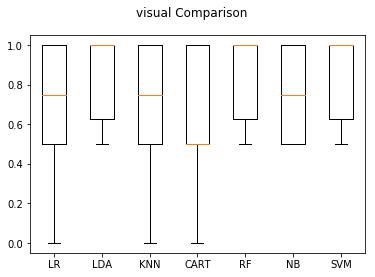

In [14]:

fig = plt.figure()
fig.suptitle('visual Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Based models comparsion i pick up svm because of the below given reason

Since this is a classification problem we will require a classifier which can deal with large number of features but less number of test samples.
We will be using SVM classifier  for predicting the result
### SVM 

In [16]:

svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


['0' '0' '0' '0' '0']
0.8
[[4 0]
 [1 0]]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       0.00      0.00      0.00         1

avg / total       0.64      0.80      0.71         5



### Inference

We have a pretty good accuracy for the baseline model of 71%. The model can be improved by taking into account the region and position of the genes as they contribute to the mutation percentage. 